# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [2]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    parameters = {
        "W1": np.random.randn(input_size, hidden_size) * 0.1,
        "b1": np.zeros((1, hidden_size)),
        "W2": np.random.randn(hidden_size, output_size) * 0.1,
        "b2": np.zeros((1, output_size))
    }
    return parameters



TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [3]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return (x > 0).astype(float)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    s = sigmoid(x)
    return s * (1 - s)


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [4]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    Z1 = np.dot(X, parameters["W1"]) + parameters["b1"]
    A1 = relu(Z1)
    Z2 = np.dot(A1, parameters["W2"]) + parameters["b2"]
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache


TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [5]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))


TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [6]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    m = X.shape[0]
    dZ2 = cache["A2"] - y_true
    dW2 = np.dot(cache["A1"].T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, parameters["W2"].T)
    dZ1 = dA1 * relu_derivative(cache["Z1"])
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients


TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [7]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    parameters["W1"] -= learning_rate * gradients["dW1"]
    parameters["b1"] -= learning_rate * gradients["db1"]
    parameters["W2"] -= learning_rate * gradients["dW2"]
    parameters["b2"] -= learning_rate * gradients["db2"]
    return parameters


TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [15]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

hidden_layer_sizes = [32, 64, 128]

for size in hidden_layer_sizes:
    print(f"\nTraining with hidden layer size: {size}")
    train_model(x_train.reshape(x_train.shape[0], -1), y_train, hidden_size=size, epochs=25, learning_rate=0.01)


Training with hidden layer size: 32
Epoch 0, Loss: 0.5970
Epoch 1, Loss: 0.6415
Epoch 2, Loss: 0.6808
Epoch 3, Loss: 0.7181
Epoch 4, Loss: 0.7555
Epoch 5, Loss: 0.7944
Epoch 6, Loss: 0.8361
Epoch 7, Loss: 0.8812
Epoch 8, Loss: 0.9302
Epoch 9, Loss: 0.9830
Epoch 10, Loss: 1.0392
Epoch 11, Loss: 1.0981
Epoch 12, Loss: 1.1588
Epoch 13, Loss: 1.2200
Epoch 14, Loss: 1.2808
Epoch 15, Loss: 1.3399
Epoch 16, Loss: 1.3966
Epoch 17, Loss: 1.4501
Epoch 18, Loss: 1.5001
Epoch 19, Loss: 1.5462
Epoch 20, Loss: 1.5884
Epoch 21, Loss: 1.6266
Epoch 22, Loss: 1.6610
Epoch 23, Loss: 1.6918
Epoch 24, Loss: 1.7191

Training with hidden layer size: 64
Epoch 0, Loss: 0.7140
Epoch 1, Loss: 0.7663
Epoch 2, Loss: 0.8188
Epoch 3, Loss: 0.8736
Epoch 4, Loss: 0.9314
Epoch 5, Loss: 0.9927
Epoch 6, Loss: 1.0572
Epoch 7, Loss: 1.1240
Epoch 8, Loss: 1.1919
Epoch 9, Loss: 1.2597
Epoch 10, Loss: 1.3261
Epoch 11, Loss: 1.3901
Epoch 12, Loss: 1.4508
Epoch 13, Loss: 1.5075
Epoch 14, Loss: 1.5601
Epoch 15, Loss: 1.6082
Epo

TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [8]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {key: np.zeros_like(val) for key, val in parameters.items()}
    s = {key: np.zeros_like(val) for key, val in parameters.items()}
    t = 0
    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1
    for key in parameters.keys():
        v[key] = beta1 * v[key] + (1 - beta1) * gradients["d" + key]
        s[key] = beta2 * s[key] + (1 - beta2) * (gradients["d" + key] ** 2)
        v_corrected = v[key] / (1 - beta1 ** t)
        s_corrected = s[key] / (1 - beta2 ** t)
        parameters[key] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)
    return parameters, v, s, t


TODO: Implement Adam optimizer into the training loop.

In [16]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size, output_size = X_train.shape[1], y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    v, s, t = initialize_adam(parameters)
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

hidden_layer_sizes = [32, 64, 128]

for size in hidden_layer_sizes:
    print(f"\nTraining with hidden layer size: {size}")
    train_model_with_adam(x_train.reshape(x_train.shape[0], -1), y_train, hidden_size=size, epochs=25, learning_rate=0.01)


Training with hidden layer size: 32
Epoch 0, Loss: 0.8277
Epoch 1, Loss: 1.3271
Epoch 2, Loss: 1.8942
Epoch 3, Loss: 2.6225
Epoch 4, Loss: 3.0413
Epoch 5, Loss: 3.0445
Epoch 6, Loss: 2.7481
Epoch 7, Loss: 2.2919
Epoch 8, Loss: 1.8204
Epoch 9, Loss: 1.4583
Epoch 10, Loss: 1.2548
Epoch 11, Loss: 1.1955
Epoch 12, Loss: 1.1950
Epoch 13, Loss: 1.1584
Epoch 14, Loss: 1.0938
Epoch 15, Loss: 1.0465
Epoch 16, Loss: 1.0526
Epoch 17, Loss: 1.0975
Epoch 18, Loss: 1.1290
Epoch 19, Loss: 1.1063
Epoch 20, Loss: 1.0365
Epoch 21, Loss: 0.9610
Epoch 22, Loss: 0.9159
Epoch 23, Loss: 0.9059
Epoch 24, Loss: 0.9081

Training with hidden layer size: 64
Epoch 0, Loss: 0.6535
Epoch 1, Loss: 2.0183
Epoch 2, Loss: 3.1816
Epoch 3, Loss: 2.9796
Epoch 4, Loss: 2.2125
Epoch 5, Loss: 1.5007
Epoch 6, Loss: 1.0990
Epoch 7, Loss: 0.9948
Epoch 8, Loss: 1.0620
Epoch 9, Loss: 1.1413
Epoch 10, Loss: 1.1332
Epoch 11, Loss: 1.0695
Epoch 12, Loss: 0.9935
Epoch 13, Loss: 0.9401
Epoch 14, Loss: 0.9376
Epoch 15, Loss: 0.9654
Epo

### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [10]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {key: np.zeros_like(val) for key, val in parameters.items()}
    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters.keys():
        s[key] = beta * s[key] + (1 - beta) * (gradients["d" + key] ** 2)
        parameters[key] -= learning_rate * gradients["d" + key] / (np.sqrt(s[key]) + epsilon)
    return parameters, s


TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [17]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)

        print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return loss_history

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Epoch 0, Loss: 0.6721
Epoch 1, Loss: 0.7578
Epoch 2, Loss: 0.8513
Epoch 3, Loss: 0.9515
Epoch 4, Loss: 1.0547
Epoch 5, Loss: 1.1579
Epoch 6, Loss: 1.2601
Epoch 7, Loss: 1.3630
Epoch 8, Loss: 1.4690
Epoch 9, Loss: 1.5782
Epoch 10, Loss: 1.6869
Epoch 11, Loss: 1.7895
Epoch 12, Loss: 1.8804
Epoch 13, Loss: 1.9552
Epoch 14, Loss: 2.0114
Epoch 15, Loss: 2.0478
Epoch 16, Loss: 2.0646
Epoch 17, Loss: 2.0630
Epoch 18, Loss: 2.0451
Epoch 19, Loss: 2.0134
Epoch 20, Loss: 1.9703
Epoch 21, Loss: 1.9183
Epoch 22, Loss: 1.8597
Epoch 23, Loss: 1.7971
Epoch 24, Loss: 1.7327
Epoch 25, Loss: 1.6685
Epoch 26, Loss: 1.6063
Epoch 27, Loss: 1.5472
Epoch 28, Loss: 1.4917
Epoch 29, Loss: 1.4402
Epoch 30, Loss: 1.3925
Epoch 31, Loss: 1.3483
Epoch 32, Loss: 1.3076
Epoch 33, Loss: 1.2702
Epoch 34, Loss: 1.2360
Epoch 35, Loss: 1.2050
Epoch 36, Loss: 1.1771
Epoch 37, Loss: 1.1520
Epoch 38, Loss: 1.1295
Epoch 39, Loss: 1.1093
Epoch 40, Loss: 1.0910
Epoch 41, Loss: 1.0745
Epoch 42, Loss: 1.0596
Epoch 43, Loss: 1.046

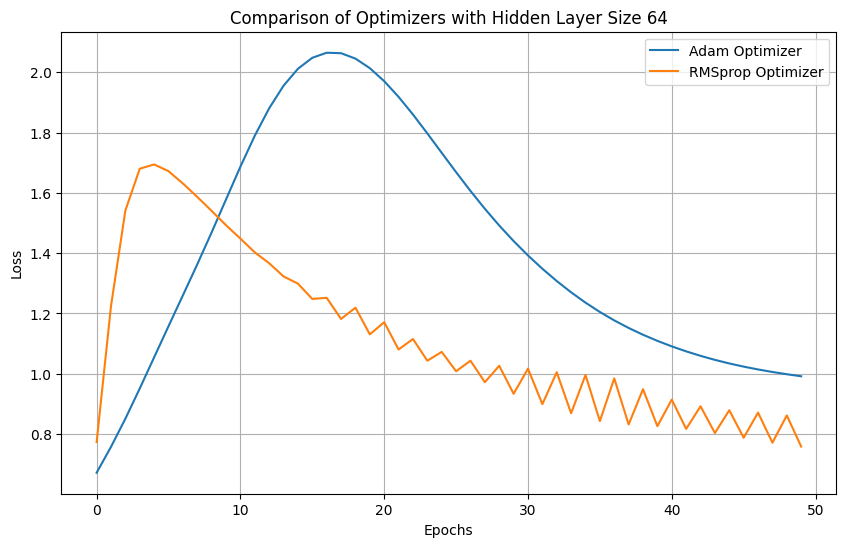

In [18]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    adam_losses = train_model(X_train, y_train, hidden_size, epochs, learning_rate=0.001, optimizer='adam')
    rmsprop_losses = train_model(X_train, y_train, hidden_size, epochs, learning_rate=0.001, optimizer='rmsprop')

    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), adam_losses, label='Adam Optimizer')
    plt.plot(range(epochs), rmsprop_losses, label='RMSprop Optimizer')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Comparison of Optimizers with Hidden Layer Size {hidden_size}')
    plt.legend()
    plt.grid(True)
    plt.show()

X_train_flattened = x_train.reshape(x_train.shape[0], -1)

compare_optimizers(X_train_flattened, y_train, hidden_size=64, epochs=50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [19]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients["d" + key]
    return parameters


2. Modify the Training Loop


In [20]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return loss_history


3. Experiment with Different Learning Rates



Training with learning rate: 0.001
Epoch 0, Loss: 0.7021
Epoch 1, Loss: 0.7072
Epoch 2, Loss: 0.7123
Epoch 3, Loss: 0.7174
Epoch 4, Loss: 0.7224
Epoch 5, Loss: 0.7274
Epoch 6, Loss: 0.7323
Epoch 7, Loss: 0.7373
Epoch 8, Loss: 0.7422
Epoch 9, Loss: 0.7471
Epoch 10, Loss: 0.7521
Epoch 11, Loss: 0.7569
Epoch 12, Loss: 0.7618
Epoch 13, Loss: 0.7667
Epoch 14, Loss: 0.7716
Epoch 15, Loss: 0.7765
Epoch 16, Loss: 0.7813
Epoch 17, Loss: 0.7862
Epoch 18, Loss: 0.7911
Epoch 19, Loss: 0.7960
Epoch 20, Loss: 0.8009
Epoch 21, Loss: 0.8058
Epoch 22, Loss: 0.8107
Epoch 23, Loss: 0.8156
Epoch 24, Loss: 0.8206
Epoch 25, Loss: 0.8255
Epoch 26, Loss: 0.8305
Epoch 27, Loss: 0.8355
Epoch 28, Loss: 0.8405
Epoch 29, Loss: 0.8455
Epoch 30, Loss: 0.8505
Epoch 31, Loss: 0.8556
Epoch 32, Loss: 0.8607
Epoch 33, Loss: 0.8658
Epoch 34, Loss: 0.8709
Epoch 35, Loss: 0.8761
Epoch 36, Loss: 0.8812
Epoch 37, Loss: 0.8864
Epoch 38, Loss: 0.8916
Epoch 39, Loss: 0.8969
Epoch 40, Loss: 0.9021
Epoch 41, Loss: 0.9074
Epoch 42

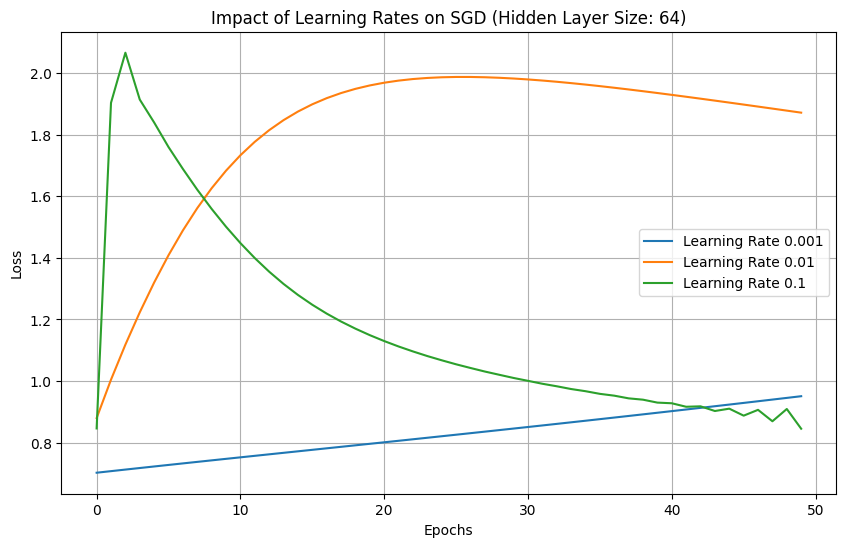

In [21]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        loss_history = train_model_with_sgd(X_train, y_train, hidden_size, epochs, learning_rate=lr)
        plt.plot(range(epochs), loss_history, label=f'Learning Rate {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Impact of Learning Rates on SGD (Hidden Layer Size: {hidden_size})')
    plt.legend()
    plt.grid(True)
    plt.show()
X_train_flattened = x_train.reshape(x_train.shape[0], -1)
compare_learning_rates(X_train_flattened, y_train, hidden_size=64, epochs=50, learning_rates=[0.001, 0.01, 0.1])

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [22]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {key: np.zeros_like(val) for key, val in parameters.items()}
    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for key in parameters.keys():
        v[key] = beta * v[key] + (1 - beta) * gradients["d" + key]
        parameters[key] -= learning_rate * v[key]
    return parameters, v


3. Modify the Training Loop


In [23]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    if optimizer == 'momentum':
        v = initialize_momentum(parameters)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'sgd':
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        elif optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)

        print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return loss_history

4. Train the Model with Both Optimizers


Epoch 0, Loss: 0.5176
Epoch 1, Loss: 0.5817
Epoch 2, Loss: 0.6398
Epoch 3, Loss: 0.6957
Epoch 4, Loss: 0.7519
Epoch 5, Loss: 0.8099
Epoch 6, Loss: 0.8704
Epoch 7, Loss: 0.9335
Epoch 8, Loss: 0.9988
Epoch 9, Loss: 1.0652
Epoch 10, Loss: 1.1318
Epoch 11, Loss: 1.1973
Epoch 12, Loss: 1.2606
Epoch 13, Loss: 1.3209
Epoch 14, Loss: 1.3774
Epoch 15, Loss: 1.4296
Epoch 16, Loss: 1.4775
Epoch 17, Loss: 1.5208
Epoch 18, Loss: 1.5598
Epoch 19, Loss: 1.5945
Epoch 20, Loss: 1.6252
Epoch 21, Loss: 1.6522
Epoch 22, Loss: 1.6758
Epoch 23, Loss: 1.6963
Epoch 24, Loss: 1.7138
Epoch 25, Loss: 1.7288
Epoch 26, Loss: 1.7414
Epoch 27, Loss: 1.7519
Epoch 28, Loss: 1.7605
Epoch 29, Loss: 1.7675
Epoch 30, Loss: 1.7729
Epoch 31, Loss: 1.7769
Epoch 32, Loss: 1.7798
Epoch 33, Loss: 1.7815
Epoch 34, Loss: 1.7823
Epoch 35, Loss: 1.7823
Epoch 36, Loss: 1.7815
Epoch 37, Loss: 1.7800
Epoch 38, Loss: 1.7780
Epoch 39, Loss: 1.7754
Epoch 40, Loss: 1.7724
Epoch 41, Loss: 1.7689
Epoch 42, Loss: 1.7651
Epoch 43, Loss: 1.761

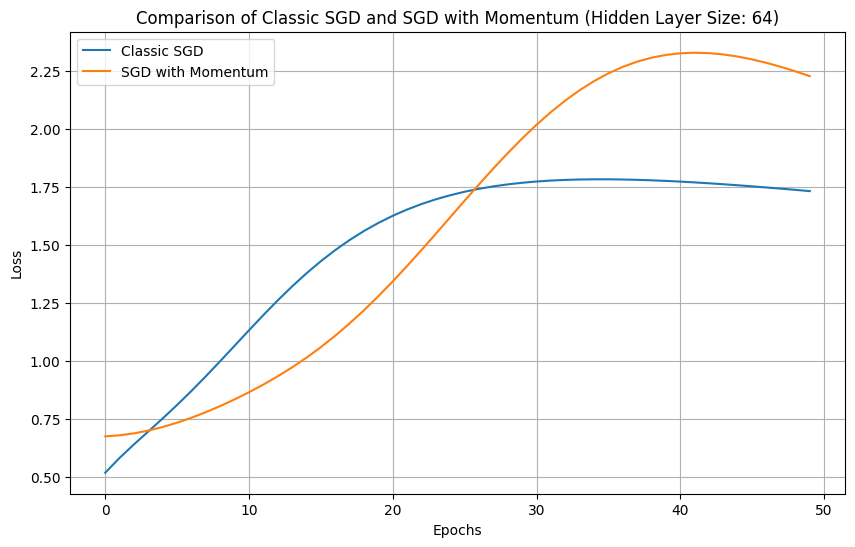

In [24]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    sgd_losses = train_model(X_train, y_train, hidden_size, epochs, learning_rate=0.01, optimizer='sgd')
    momentum_losses = train_model(X_train, y_train, hidden_size, epochs, learning_rate=0.01, optimizer='momentum')

    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), sgd_losses, label='Classic SGD')
    plt.plot(range(epochs), momentum_losses, label='SGD with Momentum')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Comparison of Classic SGD and SGD with Momentum (Hidden Layer Size: {hidden_size})')
    plt.legend()
    plt.grid(True)
    plt.show()

X_train_flattened = x_train.reshape(x_train.shape[0], -1)
compare_sgd_and_momentum(X_train_flattened, y_train, hidden_size=64, epochs=50)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [25]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]
        epoch_loss = 0
        correct_predictions = 0

        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]
            A2, cache = forward_propagation(X_batch, parameters)
            epoch_loss += compute_loss(y_batch, A2)
            gradients = backward_propagation(X_batch, y_batch, parameters, cache)
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
            correct_predictions += np.sum(np.argmax(A2, axis=1) == np.argmax(y_batch, axis=1))

        loss_history.append(epoch_loss / (X_train.shape[0] // batch_size))
        accuracy_history.append(correct_predictions / X_train.shape[0])
        print(f"Epoch {epoch}, Loss: {loss_history[-1]:.4f}, Accuracy: {accuracy_history[-1]:.4f}")

    return loss_history, accuracy_history


2. Train the Model with Different Mini-Batch Sizes



Training with batch size: 16
Epoch 0, Loss: 0.7279, Accuracy: 0.7508
Epoch 1, Loss: 0.5222, Accuracy: 0.8289
Epoch 2, Loss: 0.4753, Accuracy: 0.8423
Epoch 3, Loss: 0.4486, Accuracy: 0.8507
Epoch 4, Loss: 0.4301, Accuracy: 0.8565
Epoch 5, Loss: 0.4144, Accuracy: 0.8610
Epoch 6, Loss: 0.4010, Accuracy: 0.8666
Epoch 7, Loss: 0.3910, Accuracy: 0.8700
Epoch 8, Loss: 0.3810, Accuracy: 0.8733
Epoch 9, Loss: 0.3729, Accuracy: 0.8750
Epoch 10, Loss: 0.3656, Accuracy: 0.8768
Epoch 11, Loss: 0.3587, Accuracy: 0.8790
Epoch 12, Loss: 0.3526, Accuracy: 0.8809
Epoch 13, Loss: 0.3469, Accuracy: 0.8832
Epoch 14, Loss: 0.3415, Accuracy: 0.8847
Epoch 15, Loss: 0.3363, Accuracy: 0.8874
Epoch 16, Loss: 0.3314, Accuracy: 0.8887
Epoch 17, Loss: 0.3278, Accuracy: 0.8897
Epoch 18, Loss: 0.3233, Accuracy: 0.8911
Epoch 19, Loss: 0.3194, Accuracy: 0.8921
Epoch 20, Loss: 0.3163, Accuracy: 0.8937
Epoch 21, Loss: 0.3120, Accuracy: 0.8956
Epoch 22, Loss: 0.3093, Accuracy: 0.8959
Epoch 23, Loss: 0.3054, Accuracy: 0.8

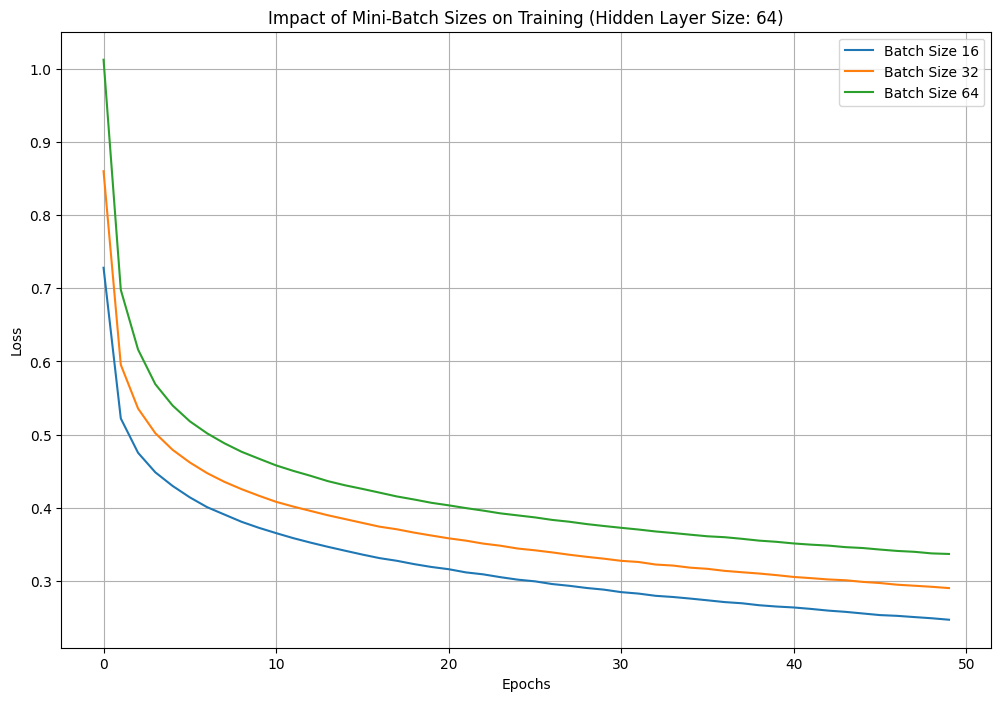

In [26]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    plt.figure(figsize=(12, 8))

    for batch_size in batch_sizes:
        print(f"\nTraining with batch size: {batch_size}")
        loss_history, accuracy_history = train_model_with_mini_batches(
            X_train, y_train, hidden_size, epochs, batch_size=batch_size
        )
        plt.plot(range(epochs), loss_history, label=f'Batch Size {batch_size}')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Impact of Mini-Batch Sizes on Training (Hidden Layer Size: {hidden_size})')
    plt.legend()
    plt.grid(True)
    plt.show()

X_train_flattened = x_train.reshape(x_train.shape[0], -1)
compare_mini_batch_sizes(X_train_flattened, y_train, hidden_size=64, epochs=50, batch_sizes=[16, 32, 64])

### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [27]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        loss_history.append(loss)
        correct_predictions = np.sum(np.argmax(A2, axis=1) == np.argmax(y_train, axis=1))
        accuracy_history.append(correct_predictions / X_train.shape[0])
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy_history[-1]:.4f}")

    return loss_history, accuracy_history


Training with Full-Batch Gradient Descent...
Epoch 0, Loss: 0.6201, Accuracy: 0.1266
Epoch 1, Loss: 0.7717, Accuracy: 0.1306
Epoch 2, Loss: 0.9143, Accuracy: 0.1325
Epoch 3, Loss: 1.0476, Accuracy: 0.1291
Epoch 4, Loss: 1.1708, Accuracy: 0.1255
Epoch 5, Loss: 1.2830, Accuracy: 0.1240
Epoch 6, Loss: 1.3841, Accuracy: 0.1254
Epoch 7, Loss: 1.4742, Accuracy: 0.1278
Epoch 8, Loss: 1.5537, Accuracy: 0.1314
Epoch 9, Loss: 1.6234, Accuracy: 0.1349
Epoch 10, Loss: 1.6841, Accuracy: 0.1391
Epoch 11, Loss: 1.7367, Accuracy: 0.1430
Epoch 12, Loss: 1.7820, Accuracy: 0.1475
Epoch 13, Loss: 1.8209, Accuracy: 0.1516
Epoch 14, Loss: 1.8540, Accuracy: 0.1554
Epoch 15, Loss: 1.8822, Accuracy: 0.1595
Epoch 16, Loss: 1.9060, Accuracy: 0.1633
Epoch 17, Loss: 1.9258, Accuracy: 0.1682
Epoch 18, Loss: 1.9423, Accuracy: 0.1727
Epoch 19, Loss: 1.9559, Accuracy: 0.1777
Epoch 20, Loss: 1.9668, Accuracy: 0.1831
Epoch 21, Loss: 1.9755, Accuracy: 0.1890
Epoch 22, Loss: 1.9821, Accuracy: 0.1944
Epoch 23, Loss: 1.987

<ipython-input-3-5e5d40e59a72>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 0, Loss: 6.5900, Accuracy: 0.0996
Epoch 1, Loss: 6.5117, Accuracy: 0.1015
Epoch 2, Loss: 6.5233, Accuracy: 0.0994
Epoch 3, Loss: 6.4364, Accuracy: 0.1011
Epoch 4, Loss: 6.4761, Accuracy: 0.1005
Epoch 5, Loss: 6.4592, Accuracy: 0.0990
Epoch 6, Loss: 6.5079, Accuracy: 0.0993
Epoch 7, Loss: 6.6231, Accuracy: 0.0993
Epoch 8, Loss: 6.4864, Accuracy: 0.1017
Epoch 9, Loss: 6.5689, Accuracy: 0.0994
Epoch 10, Loss: 6.4912, Accuracy: 0.1016
Epoch 11, Loss: 6.5561, Accuracy: 0.0983
Epoch 12, Loss: 6.5483, Accuracy: 0.0993
Epoch 13, Loss: 6.5225, Accuracy: 0.0997
Epoch 14, Loss: 6.4750, Accuracy: 0.0990
Epoch 15, Loss: 6.4447, Accuracy: 0.1011
Epoch 17, Loss: 6.5498, Accuracy: 0.1001
Epoch 18, Loss: 6.4921, Accuracy: 0.1003
Epoch 19, Loss: 6.5377, Accuracy: 0.0972
Epoch 20, Loss: 6.5621, Accuracy: 0.0997
Epoch 21, Loss: 6.5641, Accuracy: 0.1009
Epoch 22, Loss: 6.4891, Accuracy: 0.0991
Epoch 23, Loss: 6.5227, Accuracy: 0.0995
Epoch 24, Loss: 6.4920, Accuracy: 0.0995
Epoch 25, Loss: 6.5661, Ac

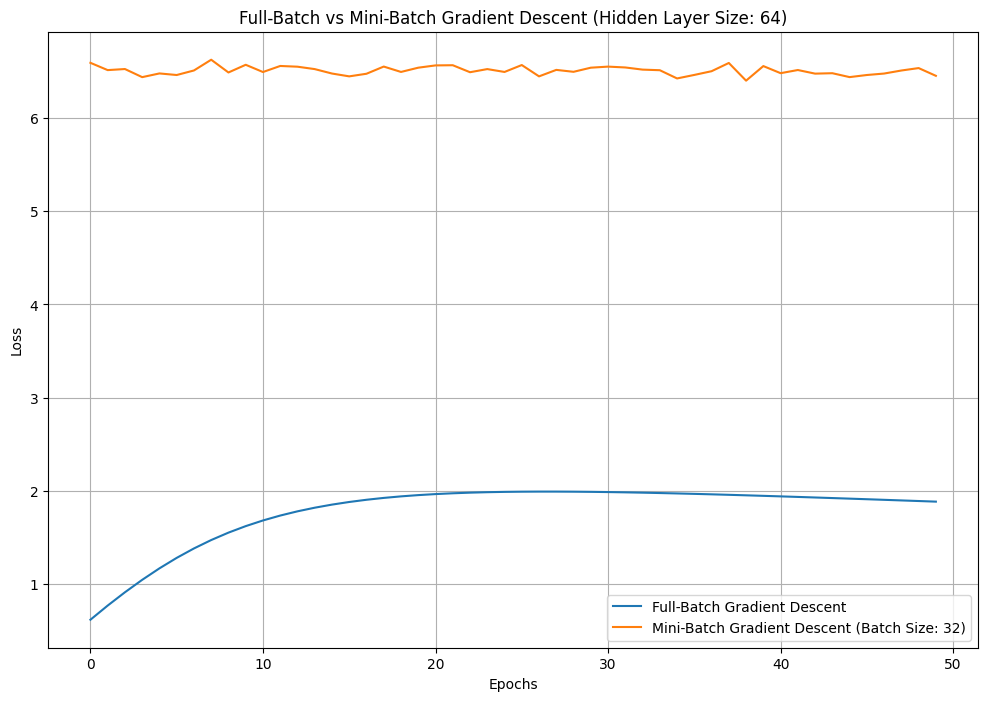

In [29]:
import time
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    print("\nTraining with Full-Batch Gradient Descent...")
    start_time = time.time()
    full_batch_loss, full_batch_accuracy = train_model_full_batch(X_train, y_train, hidden_size, epochs)
    full_batch_time = time.time() - start_time
    print(f"Full-Batch Training Time: {full_batch_time:.2f} seconds")

    print("\nTraining with Mini-Batch Gradient Descent...")
    start_time = time.time()
    mini_batch_loss, mini_batch_accuracy = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size)
    mini_batch_time = time.time() - start_time
    print(f"Mini-Batch Training Time: {mini_batch_time:.2f} seconds")

    plt.figure(figsize=(12, 8))
    plt.plot(range(epochs), full_batch_loss, label='Full-Batch Gradient Descent')
    plt.plot(range(epochs), mini_batch_loss, label=f'Mini-Batch Gradient Descent (Batch Size: {batch_size})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Full-Batch vs Mini-Batch Gradient Descent (Hidden Layer Size: {hidden_size})')
    plt.legend()
    plt.grid(True)
    plt.show()

X_train_flattened = x_train.reshape(x_train.shape[0], -1)
compare_mini_batch_and_full_batch(X_train_flattened, y_train, hidden_size=64, epochs=50, batch_size=32)